In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-whitegrid')

import numpy as np
from numpy import genfromtxt
import pandas as pd
from collections import Counter

In [2]:
packets = pd.read_csv('./timing_inside_out.csv', delimiter=';', header=0)
# , nrows=1000000

In [14]:
packets[packets.is_response == 1]

ts                   qname  is_response        ipid  df
19    1.589593e+09      www.000webhost.com            1  0x00000000   0
25    1.589593e+09        www.1000lela.com            1  0x00000000   0
27    1.589593e+09     www.100mountain.com            1  0x00000000   0
29    1.589593e+09           www.100sp.com            1  0x00000000   0
31    1.589593e+09    www.101newsmedia.com            1  0x00000000   0
33    1.589593e+09         www.102tube.com            1  0x00000000   0
35    1.589593e+09          www.1080.cloud            1  0x00000000   0
36    1.589593e+09      www.000webhost.com            1  0x0000378f   1
37    1.589593e+09   www.010-8006-9919.com            1  0x0000814f   1
39    1.589593e+09           www.05133.com            1  0x0000f589   1
40    1.589593e+09           www.07130.net            1  0x0000efc0   1
41    1.589593e+09          www.0808mm.com            1  0x0000ed31   1
42    1.589593e+09        www.1000lela.com            1  0x0000217c   1
43    1.589593e+09     www.100mountain.com            1  0x000019ef   1
44    1.589593e+09           www.100sp.com            1  0x0000f626   1
46    1.589593e+09    www.101newsmedia.com            1  0x0000b2a8   1
47    1.589593e+09         www.102tube.com            1  0x00006dd3   1
48    1.589593e+09          www.1080.cloud            1  0x00000593   1
49    1.589593e+09           www.12123.com            1  0x00005af4   1
50    1.589593e+09           www.125dy.com            1  0x00004a78   1
52    1.589593e+09           www.12bet.com            1  0x0000167b   1
59    1.589593e+09           www.12dvd.com            1  0x0000d432   1
60    1.589593e+09        www.13145207.com            1  0x0000a72d   1
61    1.589593e+09            www.1337x.to            1  0x00007ab7   1
62    1.589593e+09           www.1395p.com            1  0x00008544   1
63    1.589593e+09           www.141jj.com            1  0x0000a34f   1
64    1.589593e+09         www.1680218.com            1  0x0000881b   1
66    1.589593e+09         www.1688.com.au            1  0x00000000   0
72    1.589593e+09         www.1688.com.au            1  0x00008e26   1
73    1.589593e+09           www.1705r.com            1  0x0000f8f1   1
...            ...                     ...          ...         ...  ..
9484  1.589593e+09          www.zipleaf.us            1  0x00005f3c   1
9485  1.589593e+09          www.zipleaf.us            1  0x00000000   0
9487  1.589593e+09         www.zjhutfw.com            1  0x000025ac   1
9488  1.589593e+09         www.zjhutfw.com            1  0x00000000   0
9489  1.589593e+09            www.zluj.com            1  0x000002e7   1
9492  1.589593e+09          www.zodgame.us            1  0x000074a3   1
9494  1.589593e+09        www.zooasian.com            1  0x000001a3   1
9495  1.589593e+09        www.zooasian.com            1  0x00000000   0
9496  1.589593e+09      www.zoofiction.com            1  0x0000cbd7   1
9498  1.589593e+09     www.zoofiliaweb.com            1  0x00003eec   1
9499  1.589593e+09       www.zoosexnet.com            1  0x0000dbfb   1
9500  1.589593e+09      www.zoosexsite.com            1  0x00000996   1
9501  1.589593e+09  www.zooskoolvideos.com            1  0x00000f62   1
9502  1.589593e+09        www.zootube1.com            1  0x0000f828   1
9503  1.589593e+09       www.zoo-tube8.com            1  0x000011c3   1
9504  1.589593e+09         www.zootubex.tv            1  0x00000074   1
9505  1.589593e+09        www.zoo-xnxx.com            1  0x00006381   1
9506  1.589593e+09      www.zooxxxfree.com            1  0x0000ca22   1
9507  1.589593e+09      www.zooyouporn.com            1  0x0000636e   1
9508  1.589593e+09          www.zophar.net            1  0x0000487d   1
9509  1.589593e+09          www.zophar.net            1  0x00000000   0
9510  1.589593e+09              www.zpn.im            1  0x0000c9ea   1
9511  1.589593e+09              www.zpn.im            1  0x00000000   0
9512  1.589593e+09              www.zrj.pw            1 

In [4]:
packets[packets.qname == 'www.000webhost.com']

ts               qname  is_response        ipid  df
0   1.589593e+09  www.000webhost.com            0  0x00000001   0
19  1.589593e+09  www.000webhost.com            1  0x00000000   0
36  1.589593e+09  www.000webhost.com            1  0x0000378f   1

In [5]:
censored_qname = set(packets[(packets.is_response == 1)].qname.to_list())

In [6]:
ipid0_ts = []
ipidn0_ts = []

for q in censored_qname:
    p = packets[packets.qname == q]
    if len(p) >= 3:
        sent_ts = float(p[p.is_response == 0].ts)
        ipid0 = p[(p.is_response == 1) & (p.ipid == '0x00000000')].ts.tolist()
        if len(ipid0) != 1:
            continue
        ipid0_ts.append(ipid0[0] - sent_ts)
        
        ipidn0 = p[(p.is_response == 1) & (p.ipid != '0x00000000')].ts.tolist()
        ipidn0_ts.append(ipidn0[0] - sent_ts)

In [7]:
with open('ipid0.txt', 'w') as f:
    for t in ipid0:
        f.write('%s\n' % t)

In [8]:
with open('ipidn0.txt', 'w') as f:
    for t in ipidn0:
        f.write('%s\n' % t)

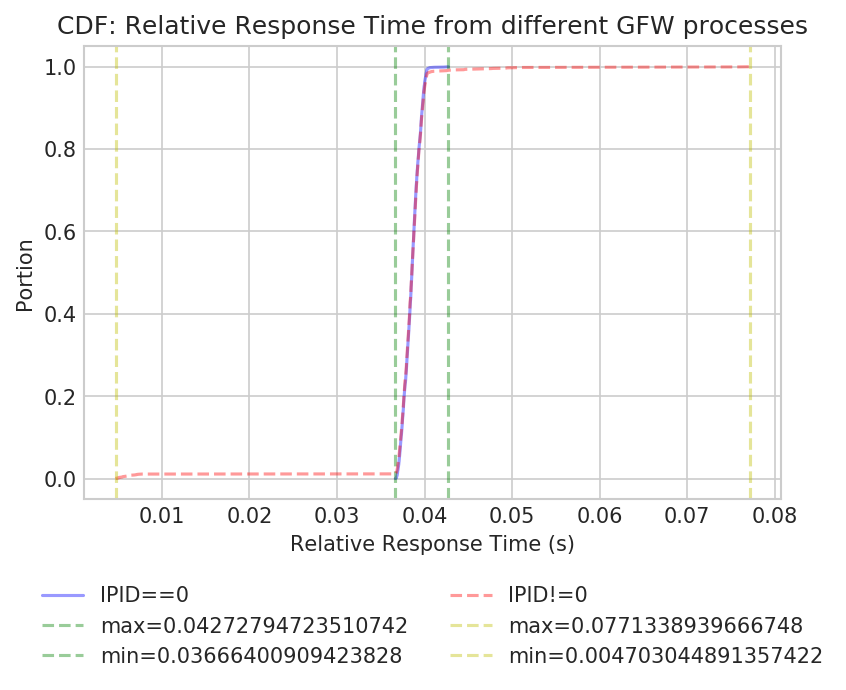

In [9]:
plt.rcParams['figure.dpi'] = 150


fig = plt.figure()
ax = plt.axes()

## IPID0

sorted_data = np.sort(ipid0_ts)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="IPID==0", color='b', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='g', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='g',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

## IPID!0

sorted_data = np.sort(ipidn0_ts)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="IPID!=0", color='r', ls='--', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='y', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='y',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

ax.set(xlabel='Relative Response Time (s)', ylabel='Portion')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fancybox=True, shadow=True)
plt.title('CDF: Relative Response Time from different GFW processes');

In [10]:
counter = 0
delta_ipid0_subtracted_by_ipidn0 = []
for compare in zip(ipid0_ts, ipidn0_ts):
    a, b = compare
    delta_ipid0_subtracted_by_ipidn0.append((a - b) * 1000)
    if a > b:
        counter += 1

print("In {} out {} DNS queries, which is {}%, IPID=0 response came first,".format(counter , len(ipid0_ts), counter / len(ipid0_ts) * 100))

In 1010 out 2210 DNS queries, which is 45.70135746606335%, IPID=0 response came first,


Text(0.5, 1.0, 'ABC123 vs $\\mathrm{ABC123}^{123}$')

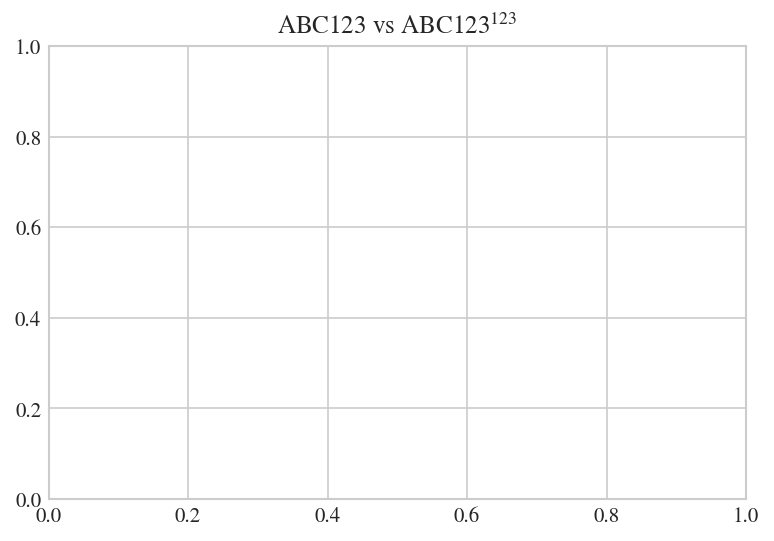

In [31]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.axisbelow'] = True
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

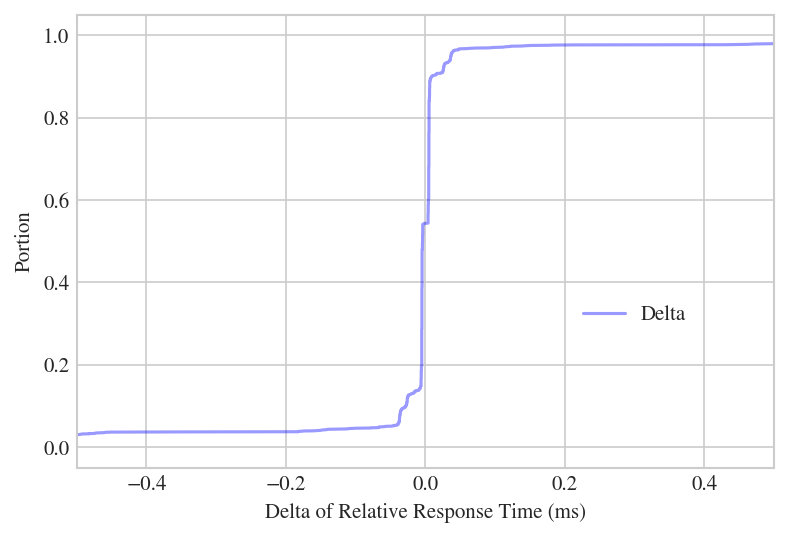

In [42]:
plt.rcParams['figure.dpi'] = 150


fig = plt.figure()
ax = plt.axes()

## IPID0

sorted_data = np.sort(delta_ipid0_subtracted_by_ipidn0)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="Delta", color='b', alpha=0.4)

# ax.axvline(x=max(sorted_data), 
#            color='g', 
#            label="max={}ms".format(round(max(sorted_data), 2)),
#            ls='--',
#            alpha=0.4)
# ax.axvline(x=min(sorted_data),
#            color='g',
#            label="min={}ms".format(round(min(sorted_data) ,2)),
#            ls='--',
#            alpha=0.4)

ax.set(xlabel='Delta of Relative Response Time (ms)', ylabel='Portion')
#ax.set_xscale('symlog')
plt.xlim(-0.5, 0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.4),
          ncol=1, fancybox=True, shadow=True)
plt.figsize=(3.75, 2)
#plt.title('CDF: Delta of Relative Response Time: Type3 - (Type1 and Type2), inside-out');
plt.savefig('delta_of_responding_time.pdf')

In [12]:
delta_ipid0_subtracted_by_ipidn0.index(max(delta_ipid0_subtracted_by_ipidn0))

1401

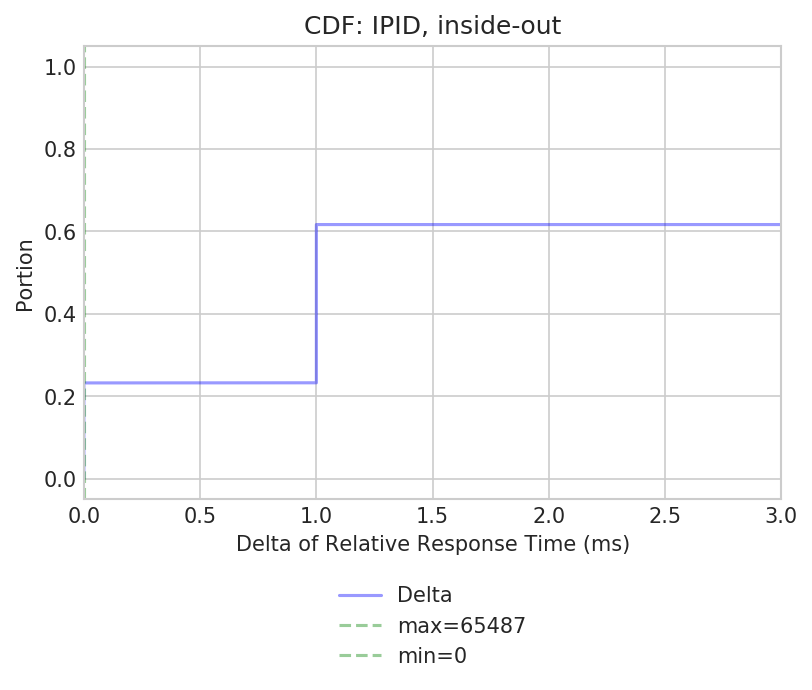

In [13]:
plt.rcParams['figure.dpi'] = 150


fig = plt.figure()
ax = plt.axes()


sorted_data = np.sort(packets.ipid.apply(lambda x: int(x, 16)).to_list())
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data, yvals, label="Delta", color='b', alpha=0.4)

ax.axvline(x=max(sorted_data), 
           color='g', 
           label="max={}".format(max(sorted_data)),
           ls='--',
           alpha=0.4)
ax.axvline(x=min(sorted_data),
           color='g',
           label="min={}".format(min(sorted_data)),
           ls='--',
           alpha=0.4)

ax.set(xlabel='Delta of Relative Response Time (ms)', ylabel='Portion')
#ax.set_xscale('symlog')
ax.set_xlim(0, 3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=1, fancybox=True, shadow=True)

plt.title('CDF: IPID, inside-out');